# **Objectif**
Le but de ce travail est d’appliquer les techniques vues en algèbre linéaire,
statistiques et probabilités sur un jeux de données.

## **Description du jeu de données**
Le jeu de données 'salaires.csv' contient des informations sur les salaires annuels
de personnes de 42 pays différents, mais la majorité (90 %) provient des Etats-
Unis. Le deuxième dans cette catégorie est le Mexique à 2%, ne laissant que
8% pour les 40 autres pays. Il y a environ 32 561 entrées avec un total de 12
colonnes représentant différents attributs des personnes. 
Voici la liste:
1. Âge : Discret
2. Classe de travail (Privé, Gouvernement fédéral, etc): Nominal
3. Education (le plus haut niveau d’éducation obtenu) : Ordinal 
4. Num´ero d’´education (le nombre d’ann´ees d’´etudes): Discret
5. Etat civil : Nominal
6. Occupation (Transport-Déménagement, Artisanat-Réparation, etc) : Nominal
7. Lien de parenté (célibataire, hors famille, etc.) : Nominal
8. Race: Nominal
9. Sexe : Nominal (2 catégories)
10. Heures (travaillées) par semaine : Discrète
11. Pays d’origine : Nominal
12. Revenu: bool´een (≤ 50 000 ,> 50 000

Importation des bibliothèques

In [135]:
import pandas as pd

Importation des données

In [136]:
salaires = pd.read_csv('salaires.csv')

# Exploration des données

In [137]:
salaires.head(10)

,age,classe.travail,education,nombre.education,etat.civil,occupation,Lien.parente,race,sexe,heures.par.semaine,pays.natal,salaire
0,90,?,HS-grad,9,Veuf,?,Pas_dans_famille,Blanc,Feminin,40,United-States,<=50K
1,82,Privee,HS-grad,9,Veuf,Exec-managerial,Pas_dans_famille,Blanc,Feminin,18,United-States,<=50K
2,66,?,Some-college,10,Veuf,?,Celibataire,Noir,Feminin,40,United-States,<=50K
3,54,Privee,7th-8th,4,Divorce,Machine-op-inspct,Celibataire,Blanc,Feminin,40,United-States,<=50K
4,41,Privee,Some-college,10,Separe,Prof-specialty,Un_enfant,Blanc,Feminin,40,United-States,<=50K
5,34,Privee,HS-grad,9,Divorce,Other-service,Celibataire,Blanc,Feminin,45,United-States,<=50K
6,38,Privee,10th,6,Separe,Adm-clerical,Celibataire,Blanc,Masculin,40,United-States,<=50K
7,74,Gouv-Provincial,Doctorate,16,Jamais_marie,Prof-specialty,Autre,Blanc,Feminin,20,United-States,>50K
8,68,Gouv-Federal,HS-grad,9,Divorce,Prof-specialty,Pas_dans_famille,Blanc,Feminin,40,United-States,<=50K
9,41,Privee,Some-college,10,Jamais_marie,Craft-repair,Celibataire,Blanc,Masculin,60,?,>50K


1. Quelle est la taille du jeu de données?

In [138]:
#Nb lignes et de colonnes
salaires.shape

(32561, 12)

In [139]:
#Taille (m * n)
salaires.size

390732

*La* taille du jeu de données est : 390732

2. Combien de valeurs manquantes y'a t-il pour chaque colonne? Quelle est la colonne (feature) qui a plus de valeurs manquantes?

In [140]:
from numpy import nan
salaires[salaires == '?'] = nan
valeurs_manquantes = salaires.isna().sum()
valeurs_manquantes

age                      0
classe.travail        1836
education                0
nombre.education         0
etat.civil               0
occupation            1843
Lien.parente             0
race                     0
sexe                     0
heures.par.semaine       0
pays.natal             583
salaire                  0
dtype: int64

Classe.travail --> 1836,
occupation --> 1843,
pays.natal --> 583.
Les autres colonnes du jeu de données n'ont pas de valeurs manquantes.

In [141]:
valeurs_manquantes.idxmax()

'occupation'

"Occupation" est la colonne avec plus de valeurs manquantes (1843)

In [142]:
#salaires = salaires.dropna()

3. Combien d'hommes y'a t-il dans ce jeu de données?

In [143]:
nb_hommes = len(salaires[salaires['sexe'] == 'Masculin'])
nb_hommes

21790

Il y'a 21790 hommes dans ce jeu de données

4. Quel est l'âge le plus élevé et le plus bas du jeu de données ?

In [144]:
max_age = salaires['age'].max()
max_age

90

L'âge le plus élevé dans ce jeu de données est: 90

In [145]:
min_age = salaires['age'].min()
min_age

17

L'âge le plus bas dans ce jeu de données est: 17

5. Combien de femmes travaillent dans le secteur privé?

In [146]:
nb_femmes_sp = len(salaires[(salaires['sexe'] == 'Feminin') & (salaires['classe.travail'] == 'Privee')])
nb_femmes_sp

7752

Le nombre de femmes qui travaillent dans le secteur privé est: 7752

6. Quelle est la liste des différents pays représentés dans la colonne représentant le pays natal/d'origine de chaque personne de notre jeu de données?

In [147]:
pays = salaires['pays.natal'].unique()
print("Les pays sont:",pays)

Les pays sont: ['United-States' nan 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']


# Algèbre linéaire

In [148]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
#Conversion du salaire
salaires["salaire"] = labelEncoder.fit_transform(salaires["salaire"].values)
salaires

,age,classe.travail,education,nombre.education,etat.civil,occupation,Lien.parente,race,sexe,heures.par.semaine,pays.natal,salaire
0,90,NaN,HS-grad,9,Veuf,NaN,Pas_dans_famille,Blanc,Feminin,40,United-States,0
1,82,Privee,HS-grad,9,Veuf,Exec-managerial,Pas_dans_famille,Blanc,Feminin,18,United-States,0
2,66,NaN,Some-college,10,Veuf,NaN,Celibataire,Noir,Feminin,40,United-States,0
3,54,Privee,7th-8th,4,Divorce,Machine-op-inspct,Celibataire,Blanc,Feminin,40,United-States,0
4,41,Privee,Some-college,10,Separe,Prof-specialty,Un_enfant,Blanc,Feminin,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Privee,Some-college,10,Jamais_marie,Protective-serv,Pas_dans_famille,Blanc,Masculin,40,United-States,0
32557,27,Privee,Assoc-acdm,12,Marie_civil,Tech-support,Epouse,Blanc,Feminin,38,United-States,0
32558,40,Privee,HS-grad,9,Marie_civil,Machine-op-inspct,Mari,Blanc,Masculin,40,United-States,1
32559,58,Privee,HS-grad,9,Veuf,Adm-clerical,Celibataire,Blanc,Feminin,40,United-States,0


Récuperer les femmes du jeu de données et splitter les données en 10% de test.

Récupérer seulements les femmes

In [149]:
femmes_df = salaires[salaires['sexe'] == 'Feminin']
femmes_df

,age,classe.travail,education,nombre.education,etat.civil,occupation,Lien.parente,race,sexe,heures.par.semaine,pays.natal,salaire
0,90,NaN,HS-grad,9,Veuf,NaN,Pas_dans_famille,Blanc,Feminin,40,United-States,0
1,82,Privee,HS-grad,9,Veuf,Exec-managerial,Pas_dans_famille,Blanc,Feminin,18,United-States,0
2,66,NaN,Some-college,10,Veuf,NaN,Celibataire,Noir,Feminin,40,United-States,0
3,54,Privee,7th-8th,4,Divorce,Machine-op-inspct,Celibataire,Blanc,Feminin,40,United-States,0
4,41,Privee,Some-college,10,Separe,Prof-specialty,Un_enfant,Blanc,Feminin,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,39,Gouv_local,Assoc-acdm,12,Marie_civil,Adm-clerical,Epouse,Blanc,Feminin,20,United-States,1
32548,37,Privee,Assoc-acdm,12,Divorce,Tech-support,Pas_dans_famille,Blanc,Feminin,40,United-States,0
32550,43,Gouv-Provincial,Some-college,10,Divorce,Adm-clerical,Autre,Blanc,Feminin,40,United-States,0
32557,27,Privee,Assoc-acdm,12,Marie_civil,Tech-support,Epouse,Blanc,Feminin,38,United-States,0


Separation des données en données de test(10%) et d'apprentissage

In [150]:
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [151]:
femme_train_df, femme_test_df = train_test_split(femmes_df[["age","nombre.education","heures.par.semaine"]], test_size=0.1)

1. Peut-on prédire l'âge d’une personne (femme) en fonction de son niveau
d’éducation et son nombre d’heures travaillées par semaine ?

In [152]:
A = femme_train_df[["nombre.education","heures.par.semaine"]].values
y = femme_train_df["age"].values

In [153]:
AT = np.matrix.transpose(A)
AT_A = np.matmul(AT,A)
AT_y = np.matmul(AT,y)
x = np.matmul(np.linalg.inv(AT_A), AT_y)
print(x)

[2.08233439 0.40054127]


In [154]:
A_test = femme_test_df[["nombre.education","heures.par.semaine"]].values
y_test = femme_test_df["age"].values

In [155]:
y_pred = np.squeeze(np.asarray(np.dot(x,np.transpose(A_test))))
score = explained_variance_score(y_test,y_pred)
print("Y_test: ", y_pred)

Y_test:  [36.76536674 28.83416932 40.52949424 ... 45.17433231 45.49524556
 32.52106993]


In [156]:
print("Score: ",score)

Score:  -0.2106752408345678


On ne peut pas prédire l'age en fonction du niveau d'education et du nombre d'heures travaillées par semaine parce que le score de prédiction est faible.

2- Si le niveau d’éducation et le nombre d’heures travaillées étaient réduits à
1 seule dimension qui capture les informations importantes des 2 (SVD) ?
Est-ce que la prédiction serait améliorée ou pas ? Vous devez tester votre
mod`ele sur les données de tests.

In [157]:
def do_svd(data_df):
  U,S, V = np.linalg.svd(data_df)
  S1 = np.zeros((data_df.shape[0],data_df.shape[1]))
  S1[:data_df.shape[1],:data_df.shape[1]] = np.diag(S)
  k = 1
  S1 = S1[:,:k]
  V = V[:k,:]
  B = U.dot(S1.dot(V))
  return U.dot(S1)

In [158]:
#Train
T_train = do_svd(femme_train_df[["nombre.education","heures.par.semaine"]])
T_train

array([[31.54036317],
       [22.59096975],
       [40.98367058],
       ...,
       [21.85009876],
       [39.50192861],
       [41.23062757]])

In [159]:
#Test
T_test = do_svd(femme_test_df[["nombre.education","heures.par.semaine"]])
T_test

array([[45.82777069],
       [21.85213849],
       [45.35359727],
       ...,
       [42.22003658],
       [47.78618452],
       [49.9302516 ]])

In [160]:
A = np.asmatrix(T_train)
AT = np.matrix.transpose(A)
AT_A = np.matmul(AT,A)
AT_y = np.matmul(AT,y)
x = np.matmul(np.linalg.inv(AT_A), AT_y)
print(x),
y_pred = np.dot(x,np.transpose(np.asmatrix(T_test)))

[[0.90238213]]


In [161]:
y_pred = np.squeeze(np.asarray(np.dot(x,np.transpose(T_test))))
score = explained_variance_score(y_test,y_pred)
print("Y_test: ", y_pred)

Y_test:  [41.35416115 19.71897919 40.92627553 ... 38.09860637 43.12139878
 45.05616659]


In [162]:
print("Score: ", score)

Score:  -0.43812772078471207


Même en réduisant le niveau d'éducation et le nombre d'heures travaillées par semaine, on ne peut pas prédire l'âge.

3. Peut-on prédire si le salaire d’une femme sera ≤ 50K en fonction de son
niveau d’éducation, son âge et son nombre d’heures travaillées par semaine
?

In [163]:
femme_train_df, femme_test_df = train_test_split(femmes_df[["age","nombre.education","heures.par.semaine","salaire"]], test_size=0.1)

In [164]:
A = femme_train_df[["age","nombre.education","heures.par.semaine"]].values
y = femme_train_df["salaire"].values

In [165]:
AT = np.matrix.transpose(A)
AT_A = np.matmul(AT,A)
AT_y = np.matmul(AT,y)
x = np.matmul(np.linalg.inv(AT_A), AT_y)
print(x)

[ 0.00063327  0.01184919 -0.00059568]


In [166]:
def vef(val):
  if val <= 0.5:
    return 0
  else:
    return 1

In [167]:
y_pred = np.squeeze(np.asarray(np.dot(x,np.transpose(femme_test_df[["age","nombre.education","heures.par.semaine"]]))))
y_pred = list(map(vef,y_pred))
score = explained_variance_score(y_test,y_pred)
print("Y_test: ", y_pred)

Y_test:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [168]:
print("Score: ",score)

Score:  0.0


On ne peut pas prédire que le salaire d'une femme est inférieur à 50k en fonction de son age, son niveau d'éducation et le nombre d'heures travaillées par semaine.

On ne peut pas prédire 

#Analyses statistiques et probabilistes

1. Quelle est la moyenne des âges ? Quelle est la moyenne du nombre d'heures travaillées par semaine ? et les valeurs médianes ?

In [169]:
moyenne_age = salaires['age'].mean()
print("La moyenne des âges est: ", moyenne_age)

La moyenne des âges est:  38.58164675532078


In [170]:
moyenne_hts = salaires['heures.par.semaine'].mean()
print("La moyenne du nombre d'heures travaillées par semaine est: ",moyenne_hts)

La moyenne du nombre d'heures travaillées par semaine est:  40.437455852092995


In [171]:
mediane_age = salaires['age'].median()
print("La médiane des âges est: ", mediane_age)

La médiane des âges est:  37.0


In [172]:
mediane_hts = salaires['heures.par.semaine'].median()
print("La médiane des heures travaillées par semaine est: ",mediane_hts)

La médiane des heures travaillées par semaine est:  40.0


2. Quels sont les âges (prendre les 5 premiers) les plus répresentifs de ce jeu de données? Répresentent-ils une tranche d'âge en particulier (ex: 30 - 35 ans)?

In [202]:
ages = salaires.groupby("age")['age'].count().sort_values(ascending=False).iloc[:10]
print(ages)

age
36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
Name: age, dtype: int64


 *Oui, ils représentent une tranche d'âge, mais pour avoir une tranche d'âge plus précise, nous devrions prendre au moins les 10 premiers*


3. Comment est la variance (à quel point les données sont éparpillées/dispersées) des heures travaillées par semaine ? Et les âges?

In [174]:
var_hts = salaires['heures.par.semaine'].var()
#std_hts = salaires['heures.par.semaine'].std()
# Les heures de travail sont éparpillées
print("La variance des heures de travail par semaine est: ",var_hts)
print("La variance des heures de travail par semaine est élevée, alors les données sont très dispersées")

La variance des heures de travail par semaine est:  152.45899505045415
La variance des heures de travail par semaine est élevée, alors les données sont très dispersées


In [175]:
var_age = salaires['age'].var()
#std_hts = salaires['age'].std()
#Les âges sont éparpillés
var_age
print("La variance des âges est: ",var_age)
print("La variance étant élevée alors les données sont très dispersées:")

La variance des âges est:  186.06140024880162
La variance étant élevée alors les données sont très dispersées:


4. Est ce que le niveau d'éducation, comparé à l'âge influe le plus sur la valeur du salaire? En d'autres termes est ce que le niveau d'éducation a plus de poids sur le salaire?

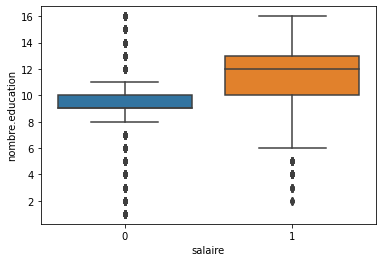

In [176]:
import seaborn as sn 
sn.boxplot(x='salaire',y='nombre.education',data=salaires);
# Le niveau d'éducation a plus de poids sur le salaire par rapport à l'âge

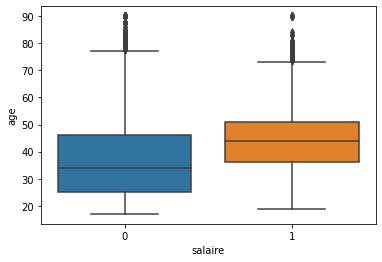

In [177]:
sn.boxplot(x='salaire',y='age',data=salaires);

Oui, le niveau d’éducation influe le plus sur la valeur du salaire comparé à l’âge. Dans notre data-set, plus les employés ont un niveau d’éducation élevé, plus ils ont tendance à avoir un salaire plus élevé.

5. Est ce que le niveau d’éducation, comparé au nombre d’heures travaillé
par semaine influe le plus sur la valeur du salaire ? En d’autres termes
est que le niveau d’éducation a plus de poids sur le salaire que le nombre
d’heures travaillées par semaine ?

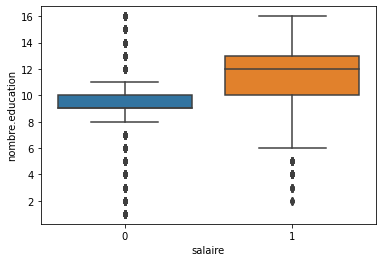

In [178]:
sn.boxplot(x='salaire',y='nombre.education',data=salaires);

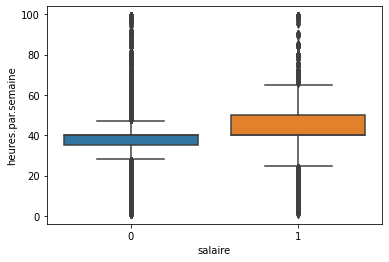

In [179]:
sn.boxplot(x='salaire',y='heures.par.semaine',data=salaires);

Conclusion : Dans ce contexte, le niveau d'éducation et le nombre d'heures travaillés par semaine ont tous une influence sur le salaire, mais le niveau d'éducation est celui qui a plus d'influence sur le salaire.

6. A quel point l’âge est un facteur qui influe le salaire ? Pour répondre à
cette question vous devez vérifier que l’âge moyen de ceux qui gagnent moins
de 50k est plus bas que ceux qui gagnent plus de 50k.

In [205]:
age_min_salaire = salaires['age'][salaires['salaire'] == 0].mean()
age_min_salaire

36.78373786407767

In [206]:
age_max_salaire = salaires['age'][salaires['salaire'] == 1].mean()
age_max_salaire

44.24984058155847

In [208]:
if age_max_salaire > age_min_salaire:
  print("L’âge est un facteur qui influe sur le salaire, parce que l’âge moyen de ceux qui gagnent plus de 50K est supérieur à celui de ceux qui gagnent moins de 50K")
else:
  print("L'âge n'est pas un factuer qui influent sur le salaire")

L’âge est un facteur qui influe sur le salaire, parce que l’âge moyen de ceux qui gagnent plus de 50K est supérieur à celui de ceux qui gagnent moins de 50K


7. A quel point le nombre d’heures travaillé par semaine est un facteur qui
influe le salaire ? Pour répondre à cette question vous devez vérifier que le
nombre moyen d’heure travaillé par semaine pour ceux qui gagnent moins
de 50k est plus bas que ceux qui gagnent plus de 50k.

In [209]:
heure_min_salaire = salaires['heures.par.semaine'][salaires['salaire'] == 0].mean()
heure_min_salaire

38.840210355987054

In [210]:
heure_max_salaire = salaires['heures.par.semaine'][salaires['salaire'] == 1].mean()
heure_max_salaire

45.473026399693914

In [212]:
if age_max_salaire > age_min_salaire:
  print("Le nombre d'heures est un facteur qui influe sur le salaire, parceque le nombre moyen d'heures travaillés par semaine de ceux qui gagnent moins de 50K est plus bas que l'autre groupe")
else:
  print("Le nombre d'heures travaillés par semaine n'est pas un factuer qui influent sur le salaire")

Le nombre d'heures est un facteur qui influe sur le salaire, parceque le nombre moyen d'heures travaillés par semaine de ceux qui gagnent moins de 50K est plus bas que l'autre groupe


8. Est ce qu’il y a une différence de salaire entre les personnes mariées et les
personnes célibataires ? Quel groupe gagne le mieux leurs vies ?

In [186]:
moy_sal_celib = salaires['salaire'][(salaires['etat.civil'] == 'Jamais_marie')].mean()
moy_sal_celib

0.04596087241411589

In [187]:
moy_sal_marie = salaires['salaire'][(salaires['etat.civil'] == 'Marie_civil')].mean()
moy_sal_marie

0.4468482905982906

In [188]:
if moy_sal_celib > moy_sal_marie:
  print("Les célibataires gagnent mieux leur vie !")
elif moy_sal_celib < moy_sal_marie:
  print("Les mariés gagnent mieux leur vie !")
else:
  print("Les célibataires gagnent autant mieux leur vie que les mariés !")

Les mariés gagnent mieux leur vie !


9. Quelle est la proportion des hommes qui ont un doctorat et qui gagnent plus
de 50k ? et chez les femmes ?

In [214]:
data_hommes = salaires[salaires['sexe'] == 'Masculin']
nbr_total_hommes_g = len(data_hommes[(data_hommes['education'] == 'Doctorate') & (data_hommes['salaire'] == 1)])
prop_hommes = nbr_total_hommes_g / len(data_hommes)
print("La proportion des hommes qui ont un doctorat et qui gagnent plus de 50K est: ", prop_hommes)

La proportion des hommes qui ont un doctorat et qui gagnent plus de 50K est:  0.011748508490133088


In [216]:
data_femmes = salaires[salaires['sexe'] == 'Feminin']
nbr_total_femmes_g = len(data_femmes[(data_femmes['education'] == 'Doctorate') & (data_femmes['salaire'] == 1)])
prop_femmes = nbr_total_femmes_g / len(data_femmes)
print("La proportion des femmes qui ont un doctorat et qui gagnent plus de 50K est: ", prop_femmes)

La proportion des femmes qui ont un doctorat et qui gagnent plus de 50K est:  0.004642094513044285


10- Quelle est la proportion des femmes mariées qui n’ont pas fait de masters
ni de doctorat ? et chez les hommes ?

In [191]:
data_femmes = salaires[(salaires['sexe'] == 'Feminin') & (salaires['etat.civil'] == 'Marie_civil')]
nbr_total_femmes_edu = len(data_femmes[(data_femmes['education'] != 'Doctorate') & (data_femmes['education'] != 'Masters')])
prop_femmes_mariees = nbr_total_femmes_edu / len(data_femmes)
print("La proportion des femmes mariées qui n'ont ni de master ni un doctorat est: ", prop_femmes_mariees)

La proportion des femmes mariées qui n'ont ni de master ni un doctorat est:  0.9197344598672299


In [192]:
data_hommes = salaires[(salaires['sexe'] == 'Masculin') & (salaires['etat.civil'] == 'Marie_civil')]
nbr_total_hommes_edu = len(data_hommes[(data_hommes['education'] != 'Doctorate') & (data_hommes['education'] != 'Masters')])
prop_hommes_maries = nbr_total_hommes_edu / len(data_hommes)
print("La proportion des hommes mariés qui n'ont ni de master ni un doctorat est: ", prop_hommes_maries)

La proportion des hommes mariés qui n'ont ni de master ni un doctorat est:  0.9132066971994894


11. Les ressortissants de quel pays ont les salaires les plus élevés uniquement dans notre échantillon?

In [217]:
pays_salaire = salaires.groupby('pays.natal').mean()
print("Le pays pays qui a les ressortissants avec le salaire le plus élevé est: ", pays_salaire['salaire'].idxmax())


Le pays pays qui a les ressortissants avec le salaire le plus élevé est:  Iran


12. Quelle race a les salaires les plus élevés uniquement dans notre échantillon?

In [194]:
race_salaire = salaires.groupby(['race']).mean()
print("La race avec le salaire le plus élevé est: ", race_salaire['salaire'].idxmax())

La race avec le salaire le plus élevé est:  Asiatique


# Tests d'hypothèses

1. Est-ce qu’on peut dire que la moyenne d’heures travaillées par semaine est autour de 40h/semaine ? Est-ce que l’affirmer serait significatif ?

In [219]:
# Calcul de la moyenne des heures travaillées par semaine
moyennne_heures = salaires['heures.par.semaine'].mean()
moyennne_heures

40.437455852092995

In [196]:
from scipy.stats import ttest_1samp

In [220]:
print("Hypothèse nulle H0: mhs_Homme = mhs_Femme")
print("Hyothèse alternative H1: mhs_Homme != mhs_Femme")
moyenne_prop = 40.0
results, p_value = ttest_1samp(salaires['heures.par.semaine'], moyenne_prop)
print("P-value: {}".format(p_value))
if p_value < 0.05:
  print("Rejetter l'hypothèse nulle")
else:
  print("On accepte l'hypothèse nulle")

Hypothèse nulle H0: mhs_Homme = mhs_Femme
Hyothèse alternative H1: mhs_Homme != mhs_Femme
P-value: 1.6483286793366825e-10
Rejetter l'hypothèse nulle


* **p_value < 0.05, le test est significatif au seuil alpha=5%, donc on rejette l'hypothèse nulle au profit de l'hypothèse alternative.** *

2. Est ce que les hommes ont en moyenne un salaire supérieur à 50k comparé
aux femmes ? est-ce significatif ?

In [198]:
from scipy.stats import ttest_ind

In [199]:
print("Hypothèse nulle H0: ms_Homme = ms_Femme")
print("Hyothèse alternative H1: ms_Homme > ms_Femme")

data_hommes_sal = salaires['salaire'][(salaires['sexe'] == 'Masculin')]
data_femmes_sal = salaires['salaire'][(salaires['sexe'] == 'Feminin')]

print("Moyenne SH: ",data_hommes_sal.mean())
print("Moyenne SF: ",data_femmes_sal.mean())

resultat, p_value = ttest_ind(data_femmes_sal,data_hommes_sal)
print("P-value: ", p_value)
if p_value < 0.05:
  print("Rejetter l'hypothèse nulle")
else:
  print("On accepte l'hypothèse nulle")

Hypothèse nulle H0: ms_Homme = ms_Femme
Hyothèse alternative H1: ms_Homme > ms_Femme
Moyenne SH:  0.3057365764111978
Moyenne SF:  0.10946058861758426
P-value:  0.0
Rejetter l'hypothèse nulle


***Les hommes n'ont pas en moyenne un salaire >50K comparé aux femmes.***

3. Est ce qu’il y a un lien quelconque entre l’âge et le nombre d’heures travaillées
par semaine ? est-ce significatif ?

In [200]:
from scipy.stats import ttest_rel

In [201]:
print("Hypothèse nulle H0: Il existe un lien entre l'âge et le nombre d'heures travaillées")
print("Hypothèse alternative H1: Il n'existe pas de lien entre l'âge et le nombre d'heures travaillées")
age_salaire_df = salaires[["age","heures.par.semaine"]]
print("Moyenne age: ",age_salaire_df["age"].mean())
print("Moyenne HTS: ",age_salaire_df["heures.par.semaine"].mean())

result, p_value = ttest_rel(age_salaire_df["age"],age_salaire_df["heures.par.semaine"])
print("P-value: ",p_value)

if p_value < 0.05:
  print("Rejetter l'hypothèse nulle")
else:
  print("On accepte l'hypothèse nulle")



Hypothèse nulle H0: Il existe un lien entre l'âge et le nombre d'heures travaillées
Hypothèse alternative H1: Il n'existe pas de lien entre l'âge et le nombre d'heures travaillées
Moyenne age:  38.58164675532078
Moyenne HTS:  40.437455852092995
P-value:  6.751525347329476e-79
Rejetter l'hypothèse nulle


***Comme p_value < 0.05, alors on rejette l'hypothèse nulle au profit de l'hypothèse alternative. Alors il n'existe pas de lien entre l'age et le nombre d'heures travaillées***